/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, -1}


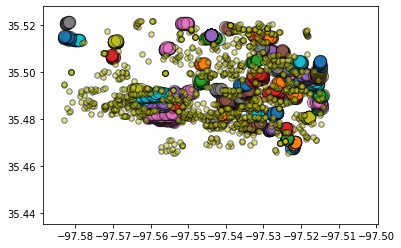

In [2]:
# Playing with cluster analysis of multifamily buildings in NW central OKC.
#
# See https://github.com/gboeing/urban-data-science/blob/master/15-Spatial-Cluster-Analysis/cluster-analysis.ipynb

import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics

df = pd.read_csv('multifamily_coords.csv')
df = df.sort_values(by=['lat','lon'])

coords = df.as_matrix(columns=['lat','lon'])

kms_per_radian = 6371.0088
epsilon = 0.1 / kms_per_radian

db = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree',metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
unique_labels = set(cluster_labels)

print(unique_labels)

fig,ax = plt.subplots()
for cluster_label in unique_labels:
    size = 150
    if cluster_label == -1:
        size = 30
    x_coords = coords[cluster_labels==cluster_label][:,1]
    y_coords = coords[cluster_labels==cluster_label][:,0]
    ax.scatter(x=x_coords, y=y_coords, edgecolor='k', s=size, alpha=0.5)

plt.show()

%matplotlib inline